# Using only OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt
import re
from image_config import * 

In [2]:
IMAGE_PATH = './../table_image_2.png'
IMAGE_PATH_2 = './../single-info.png'
IMAGE_PATH_3 = './../demo_image_opencv.jpg'

In [3]:
image = cv2.imread(IMAGE_PATH_3)
# image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

In [4]:
contours,image_with_contours = find_and_draw_contours_in_image(image)

In [5]:
image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)

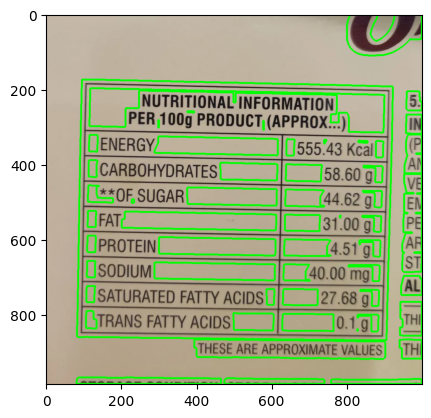

In [6]:
plt.imshow(image_with_contours_rgb)

In [7]:
rectangular_contours , image_with_only_rectangular_contours = filter_and_draw_rectangular_contours(image,contours)

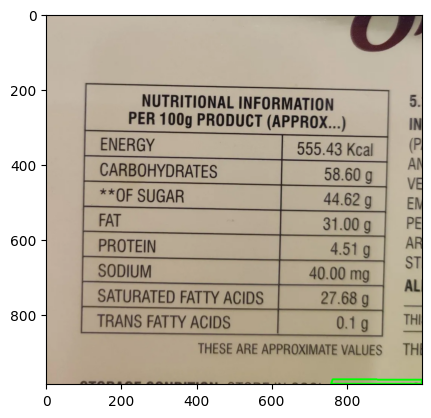

In [8]:
plt.imshow(image_with_only_rectangular_contours)

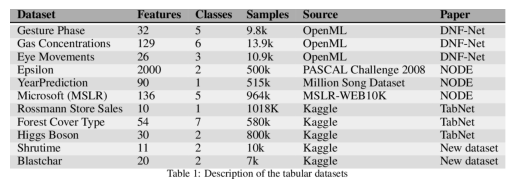

In [18]:
# Load an OpenCV image

# Check if the image was loaded successfully
if image is not None:
    # Convert BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
else:
    print("Failed to load the image.")

In [19]:
img_cv = image.copy()
img_resized = cv2.resize(img_cv,
                         (int(img_cv.shape[1] + (img_cv.shape[1] * .1)),
                          int(img_cv.shape[0] + (img_cv.shape[0] * .25))),
                         interpolation=cv2.INTER_AREA) 
img_rgb = cv2.cvtColor(img_resized,cv2.COLOR_BGR2RGB)

## Grayscale Conversion

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
len(gray_image.shape)

2

In [7]:
dilated_image = dilate_image(gray_image)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'dilate'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'


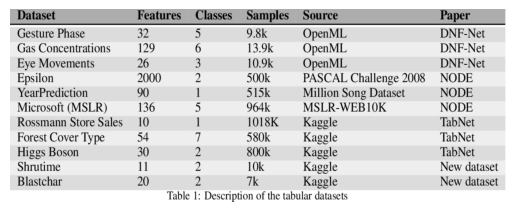

In [20]:
# Display the binarized image using matplotlib
plt.imshow(img_rgb, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

## Image Binarization to convert it to black and white 

In [58]:
_, binarized_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [59]:
cv2.imwrite('processed_image.jpg', binarized_image)

True

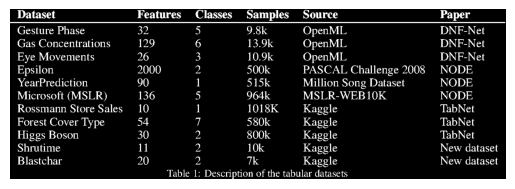

In [60]:
# Display the binarized image using matplotlib
plt.imshow(binarized_image, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Using tesseract

In [33]:
import pytesseract 
from pytesseract import image_to_string

In [34]:
extracted_text = image_to_string(binarized_image)

In [35]:
from pytesseract import image_to_string
extracted_text = image_to_string(binarized_image)

In [36]:
extracted_text

'Dataset\n\nFeatures\n32\n\nClasses\n\nSamples\n\n9.8k\n\nSource\n\nPaper\n\nGesture Phase\n\nGas Concentrations\nEye Movements\nEpsilon\nYearPrediction\nMicrosoft (MSLR)\nRossmann Store Sales\nForest Cover Type\nHiggs Boson\nShrutime\n\nBlastchar\n\n129\n26\n2000\n90\n136\n10\n54\n30\n\n11\n20\n\nNNNDeE UME NWAW\n\n13.9k\n10.9k\n500k\n515k\n964k\n1018K\n580k\n800k\n10k\n7k\n\nOpenML\n\nOpenML\n\nOpenML\n\nPASCAL Challenge 2008\nMillion Song Dataset\nMSLR-WEB10K\nKaggle\n\nKaggle\n\nKaggle\n\nKaggle\n\nKaggle\n\nTable 1: Description of the tabular datasets\n\nDNF-Net\nDNF-Net\nDNF-Net\nNODE\nNODE\nNODE\nTabNet\nTabNet\nTabNet\nNew dataset\nNew dataset\n'

### Verify what has been Extracted 

In [37]:
with open('output.txt', 'w') as file:
    file.write(extracted_text)

### Setup Excel

In [16]:
from openpyxl import Workbook


In [17]:
wb = Workbook()
ws = wb.active

In [18]:
rows = extracted_text.strip().split('\n')

In [19]:
rows

['Date collected|Plot__|Species |Sex Weight',
 '1/9/78 1|DM M 40',
 '1/9/78 1|DM EF 36',
 '1/9/78 41|DS EF 135',
 '1/20/78 1|DM F 39',
 '1/20/78 2|DM M 43',
 '1/20/78 2|DS EF 144',
 '3/13/78 2|DM EF 51',
 '3/13/78 2|DM EF 44',
 '3/13/78 2|DS EF 146']

In [22]:
for r_index, row in enumerate(rows, start=1):
    columns = re.split(r'[|\t]+', row) if r_index == 1 else re.split(r'[|\t\s]+', row)
    print(columns)
    for c_index, cell_value in enumerate(columns, start=1):
        ws.cell(row=r_index, column=c_index, value=cell_value.strip())

['Date collected', 'Plot__', 'Species ', 'Sex Weight']
['1/9/78', '1', 'DM', 'M', '40']
['1/9/78', '1', 'DM', 'EF', '36']
['1/9/78', '41', 'DS', 'EF', '135']
['1/20/78', '1', 'DM', 'F', '39']
['1/20/78', '2', 'DM', 'M', '43']
['1/20/78', '2', 'DS', 'EF', '144']
['3/13/78', '2', 'DM', 'EF', '51']
['3/13/78', '2', 'DM', 'EF', '44']
['3/13/78', '2', 'DS', 'EF', '146']


In [23]:
columns

['3/13/78', '2', 'DS', 'EF', '146']

In [24]:
wb.save('output.xlsx')

In [64]:
from image_config import *

In [ ]:
dilated_image = dilate_image(image)